<a href="https://colab.research.google.com/github/BaekTree/TIBigdataMiddleware/blob/master/koreanNewsProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
drive  sample_data


# print 할 때 표현해주는 크기를 더 높인다.

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# cleanup 
* dataframe을 정리해주는 함수이다.
* 통합 분류1에 실제 주제가 들어있다. 파싱해서 주제로 넣어준다.
* 필요 없는 column들은 모두 지운다.
* pandas dataframe에 접근할 때 : [col][row]을 통해서 접근하면, copy을 반환한다. 따라서 여기에 새로운 값을 assign하면 copy된 값에 저장되어 실제 dataframe에 아무런 변경을 주지 않는다.
* 포인트로 실제 dataframe의 값에 접근하려면, loc 혹은 iloc 함수를 사용해야 한다.
[row, col]


In [0]:
def cleanUp(data):
  # print("Inside cleanUp Function:")

  data["주제"] = None
  # print("data.shape[0] : ", data.shape[0])
  # print("""data['통합 분류1'][i].split(">")[0] : """,data["통합 분류1"][0].split(">")[0])
  for i in range(data.shape[0]):
    data.loc[i,"주제"] = data["통합 분류1"][i].split(">")[0]
  data = data.drop(['뉴스 식별자', '일자', '언론사', '기고자',  '통합 분류1', '본문','통합 분류2', '통합 분류3', '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관',  '특성추출',  'URL', '분석제외 여부'], axis = 1)
  # print(data)
  return data

# loadDataCat
* 주제를 arg으로 주면, 그 주제에 대해서 모든 month에서 가지고 와서 정리해준다.
* 거의 depreciated...

In [0]:
def loadDataCat(topic):
  print("\n\n\n",topic)
  data12 = pd.read_csv('drive/My Drive/Colab Notebooks/Machine Learning/RNN/'+topic+'utf.csv',encoding='UTF8')
  # print(data12["통합 분류1"])
  data01 = pd.read_csv('drive/My Drive/Colab Notebooks/Machine Learning/RNN/01'+topic+'utf.csv',encoding='UTF8')
  # print(data01["통합 분류1"])
  data02 = pd.read_csv('drive/My Drive/Colab Notebooks/Machine Learning/RNN/02'+topic+'utf.csv',encoding='UTF8')
  # print(data02["통합 분류1"])
  data05 = pd.read_csv('drive/My Drive/Colab Notebooks/Machine Learning/RNN/05'+topic+'utf.csv',encoding='UTF8')
  frames = [data12, data01, data02, data05]
  data = pd.concat(frames)
  data = cleanUp(data)
  return data

# loadCatCombRef
* loadDataCat을 이용
* 전체 주제 데이터를 한꺼번에 저장해서 정리까지 해준다.
* 이것도 거의 depreciated

In [0]:
def loadCatCombRef():#load each category and combine all then refine 
  pol = loadDataCat("pol")
  eco = loadDataCat("eco")
  cul = loadDataCat("cul")
  innt = loadDataCat("innt")
  it = loadDataCat("it")
  spo = loadDataCat("spo")
  soc = loadDataCat("soc")

  frames = [pol, eco, cul, innt, it, spo, soc]
  data = pd.concat(frames)
  data = data.reset_index()

  for i in range(len(data.index)):
    data["키워드"][i] = str(data.loc[i]["키워드"]).replace(","," ")

  data.to_csv("drive/My Drive/Colab Notebooks/Machine Learning/RNN/dataPrs12010205.csv")

# loadDataMntn
* 쓸만한 함수
* 특정 월month을 arg으로 전달하면, 그 월의 모든 토픽 데이터를 다 받아온다.
* claenUp 함수로 정리까지 해준다.
* 특정 월에 대한 모든 토픽 데이터를 사용하고자 할 때 이 함수를 호출!
* 통합한 데이터를 저장까지 새로 해준다!

In [0]:
 def loadDataMnth(mnth):
  if mnth == "12":
    mnth = ""

  frames = []
  topicList = ["pol", "eco", "cul", "cul", "innt", "it", "spo","soc"]
  for topic in topicList:
    data = pd.read_csv('drive/My Drive/Colab Notebooks/Machine Learning/RNN/'+mnth + topic + 'utf.csv',encoding='UTF8')
    data = cleanUp(data)
    frames.append(data)

  print("load ", mnth, " monthly data done... ")
  # print(data)
  print("now proceed to refine...")

  data = pd.concat(frames)
  data = data.reset_index()
  
  for i in range(len(data.index)):
    data["키워드"][i] = str(data.loc[i]["키워드"]).replace(","," ")

  data.to_csv("drive/My Drive/Colab Notebooks/Machine Learning/RNN/dataPrs"+mnth+".csv")
  ("refine done! monthly data saved.\n\n")
  return data

In [0]:
# loadDataMnth("12")

In [0]:
# loadDataMnth("01")

In [0]:
# loadDataMnth("02")

# loadMnthRefCob
* 쓸만한 함수
* loadMnth을 사용한다
* 월 list을 만들면, 그 list안의 모든 월들에 대해서 전체 토픽을 가져와서 합쳐준다.
* 전체 통합 데이터를 저장까지 한다.

In [0]:
# another method: load data by month and refine each then combine
def loadMnthRefCob():
  mnthList = ["12","01","02","05"]
  name = "-".join(mnthList)
  frams = []
  for i in mnthList:
    print(i," month data loading...")
    data = loadDataMnth(i)
    print(i, " month data done! data size : ", data.shape,"\n\n")
    frames.append(data)

  if len(mnthList) > 1:
    print("Each monthly data done... now proceed to combine them all...\n\n")

    data = pd.concat(frames)
    data = data.reset_index()
    data.to_csv("drive/My Drive/Colab Notebooks/Machine Learning/RNN/dataPrs"+name+".csv")

    print("combine finished. total data saved.\nTotal data size : ", data.shape,"\n\n")
  # return data
  # 각각의 month을 먼저 다 가져온다...

  #12
  # data12 = pd.read_csv('drive/My Drive/Colab Notebooks/Machine Learning/RNN/'+topic+'utf.csv',encoding='UTF8')


In [0]:
# loadMnthRefCob()

# combMnthDatas
* 이미 만들어준 월별 데이터를 합쳐서 하나로 만든다!
* 쓸모있는 함수!

In [0]:
def combMnthDatas(dataList = ["","01","02","05"]):# combine each month datas
  frames = []
  for data in dataList:
    d = pd.read_csv("drive/My Drive/Colab Notebooks/Machine Learning/RNN/dataPrs"+data+".csv",encoding='UTF8')
    frames.append(d)


  name = "-".join(dataList)

  data = pd.concat(frames)
  data = data.reset_index()
  print(data.shape)
  data.to_csv("drive/My Drive/Colab Notebooks/Machine Learning/RNN/dataPrs"+name+".csv")

In [0]:
# combMnthDatas()

# cleanUp version2
* 데이터에서... 통합분류 1,2를 비교한다. 다르면 그냥 버린다...
* 간혹 통합분류 1과 2의 분류가 다른 경우가 꽤 많다...

In [0]:
topic = "pol"
pol = pd.read_csv('drive/My Drive/Colab Notebooks/Machine Learning/RNN/'+topic+'utf.csv',encoding='UTF8')


In [0]:
pol.columns

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3', '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드', '특성추출', '본문', 'URL', '분석제외 여부'], dtype='object')

In [0]:
pol = pol.drop(['뉴스 식별자', '일자', '언론사', '기고자', '사건/사고 분류1', '사건/사고 분류2', '통합 분류3','사건/사고 분류3', '인물', '위치', '기관',  '특성추출', '본문', 'URL', '분석제외 여부'], axis = 1)

In [0]:
# nan이 있는 경우
pol["주제"] = None
isNan = list(pol["통합 분류2"].isnull())
for i,val in enumerate(isNan):
  if val == True:
    pol.loc[i,"주제"] = pol["통합 분류1"][i].split(">")[0]

In [0]:
pol["통합 분류1"]

0           정치>외교
1        정치>행정_자치
2         사회>사회일반
3        정치>국회_정당
4         정치>정치일반
           ...   
19995    정치>국회_정당
19996     정치>정치일반
19997       사회>여성
19998       정치>외교
19999     국제>국제일반
Name: 통합 분류1, Length: 20000, dtype: object

In [0]:
#다른 경우
for i in range(pol.shape[0]):
  if str(pol["통합 분류1"][i]).split(">")[0] != str(pol["통합 분류2"][i]).split(">")[0]:
    pol.loc[i,"주제"] = pol["통합 분류1"][i].split(">")[0]
    # print("1 : " , str(pol["통합 분류1"][i]).split(">")[0], ", 2 : " , str(pol["통합 분류2"][i]).split(">")[0])
  # if i > 10:
    # break
pol
"""
  만들어야 할 경우의 수:
    하나가 nan이다.
    두개가 다르다 : 앞의 걸로 바꿔야?
    두개가 같다 : 그냥 바꾼다.
"""
# cat = pol["통합 분류1"]
# for i, c in enumerate(cat):
#   # print()
#   c = c.split(">")
#   print(c[0])
#   if i > 10:
#     break

'\n  만들어야 할 경우의 수:\n    하나가 nan이다.\n    두개가 다르다 : 앞의 걸로 바꿔야?\n    두개가 같다 : 그냥 바꾼다.\n'

In [0]:
# print(type(data))

# cleanUp 탐구

## 정치 섹션에서 정치와 다르게 통합 분류에서 분류 된 기사들을 탐색

In [0]:
import pandas as pd
topic = "it"
data = pd.read_csv('drive/My Drive/Colab Notebooks/Machine Learning/RNN/'+topic+'utf.csv',encoding='UTF8')


In [0]:
data = data.drop(['뉴스 식별자', '일자', '언론사', '기고자', '사건/사고 분류1', '사건/사고 분류2', '통합 분류3','사건/사고 분류3', '인물', '위치', '기관',  '특성추출', '본문', 'URL', '분석제외 여부'], axis = 1)

In [11]:
data.head(20)

,제목,통합 분류1,통합 분류2,키워드
0,군포시 마을버스 활용해 미세먼지 측정,IT_과학>보안,IT_과학>과학,"활용,군포시,마을버스,미세,먼지,측정,앵커,미세먼지,마음,지자체들,대책,마련,고심,..."
1,[영상] ‘기생충’ 아카데미 4관왕,문화>영화,IT_과학>과학,"기생충,아카데미,4관왕,기생충,아카데미,4관왕"
2,"동신대, 사이버 전문가 양성 도우미 ‘톡톡’",IT_과학>보안,IT_과학>과학,"동신대,사이버,전문가,양성,도우미,동신대학교,에너지,융합,대학,융합,정보,보안전공,..."
3,"기아차, 소형 SUV ‘쏘넷’으로 셀토스 돌풍 잇는다",경제>자동차,경제>산업_기업,"기아차,쏘넷,소형,SUV,셀토스,돌풍,셀토스,흥행,돌풍,기아차,소형,SUV,등장,눈..."
4,“스팅어 이제 할부로 구독하세요”,경제>자동차,경제>산업_기업,"스팅어,할부,구독,기아자동차,형태,프로그램,구독,할부,기아차,프리미엄,퍼포먼스,세단..."
5,"북구, 지방정부 정책대상 ‘최우수상’ 수상",지역>전남,IT_과학>IT_과학일반,"북구,최우수상,지방,정부,정책,대상,우수,수상,광주,북구,한국지방정부학회,주관,정책..."
6,"‘스트레이트’, 신종 코로나바이러스 가짜 뉴스의 실태 [M+TV컷]",IT_과학>IT_과학일반,사회>미디어,"스트레이트,가짜,신종,코로나바이러스,가짜,실태,TV컷,신종,코로나,공포,세계,가짜,..."
7,“소니도 MWC 불참” 코로나에 스페인行 줄줄이 취소,경제>산업_기업,IT_과학>인터넷_SNS,"소니,MWC,불참,코로나,스페인,취소,일본,대표적,전자업체,소니,2주,세계이동통신박..."
8,[케이블 위성 하이라이트]2020년 2월 11일,IT_과학>과학,문화>요리_여행,"11일,2월,교양,요즘,책방,tvN,8시,리프킨,경제학자,제레미,노동,미래,예견서,..."
9,[유가증권시장 공시] 선도전기 / 잇츠한불 / 한온시스템,경제>서비스_쇼핑,국제>국제일반,"선도전기,잇츠한불,한온시스템,선도전기,삼성물산,48억,규모,판매,공급,계약,잇츠한불..."


In [42]:
count = 0
for i, d in enumerate(data["통합 분류1"]):
  if str(s).split(">")[0] != "it":
    print(str(s).split(">")[0])
    count += 1
  if i > 100:
    break
count

문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화
문화


102

## 통합 분류 1과 통합 분류 2와 기본 주제가 모두 동일해야 인정한다면?

In [21]:
#통합 분류2에 nan데이터가 많더라...
data.isnull().sum()

제목           0
통합 분류1       0
통합 분류2    3077
키워드          0
dtype: int64

In [54]:
# 둘 다 주어진 주제가 아닌 row들을 확인해보자.
count = 0
for i in range(data.shape[0]):
# 내가 또 뭘 놓쳤길래 둘 다 IT 과학인 것이 출력이 안될까?
# for i,d in enumerate(data):
  # print(data.loc[i,"통합 분류1"])
  a = str(data.loc[i,"통합 분류1"]).split(">")[0].strip()
  b = str(data.loc[i,"통합 분류2"]).split(">")[0].strip()
  # print(type(a), type(b))
  # if a == "IT_과학":
  #   print('yes A')
  # if b == "IT_과학":
  #   print('yes B')
  # # print("_",b)
  # print(data.loc[i])
  
  if not(a == "IT_과학" and  b == "IT_과학"):
    count += 1
    # print(a)
    # print(b)
    # print(i)
  # if i > 30:
  #   break
print(count)

16192


In [73]:
# 이제 전체 문서에서 그 수를 확인해보자
topicListFile = ["pol", "eco", "cul", "innt", "it", "spo","soc"]
topicKor = ["정치", "경제", "문화", "국제","IT_과학","스포츠","사회"]
for j, topic in enumerate(topicListFile):
  count = 0
  data = pd.read_csv('drive/My Drive/Colab Notebooks/Machine Learning/RNN/'+ topic + 'utf.csv',encoding='UTF8')
  for i in range(data.shape[0]):
    a = str(data.loc[i,"통합 분류1"]).split(">")[0].strip()
    b = str(data.loc[i,"통합 분류2"]).split(">")[0].strip()
    if not(a == topicKor[j] and  b == topicKor[j]):
      if(count < 5):
        print(data[["제목","키워드"]][i])
      count += 1
  print(topicKor[j]," : " , count)

KeyError: ignored

### 12월 정치 섹션 기사 20000건 중에서 정치 섹션과 다르게 통합 분류가 구분 된 기사의 수는 4000건이다.

12월 전체 기사에 대해서 확인해보자.

In [0]:
  mnth = ""
  topicListFile = ["pol", "eco", "cul", "innt", "it", "spo","soc"]
  topicKor = ["정치", "경제", "문화", "국제","IT_과학","스포츠","사회"]
  for j, topic in enumerate(topicListFile):
    count = 0
    data = pd.read_csv('drive/My Drive/Colab Notebooks/Machine Learning/RNN/'+mnth + topic + 'utf.csv',encoding='UTF8')
    # print(data[["제목","통합 분류1", "통합 분류2", "키워드"]].head(5))
    data["주제"] = topic
    count_wr = 0
    count_rgt = 0
    for i, s in enumerate(data["통합 분류1"]):
      try:
        if str(s).split(">")[0] != topicKor[j]:
          if count_wr < 5:
            # print(str(s).split(">")[0])
            print("wrong : ", data.loc[i]["제목"])
          count_wr += 1
          count += 1
        else:
          if count_rgt < 5:
            print("correct : ", data.loc[i]["제목"])
          count_rgt += 1

      except:
        print(str(s).split(">")[0])
        print(topicKor[j])
    print(topic,"has diff topic count : ", count, " out of ", len(data.index))
    print("\n\n")

보통 20000건의 기사 중 4000건 정도는 분류가 다르게 나온다. 그리고 샘플로 확인해 보았을 때, 일치하는 기사들은 대체로 맞고, 다른 토픽으로 분류 된 기사들은 정말 다르게 나온다.


다르게 나온 기사들을 그냥 제외하고 샘플을 만들어보자.

판다스 데이터 프레임에는 copy와 view가 있다. 접근하는 방법에 따라 접근 결과에 대해 object 반환하기도 하고 value을 반환하기도 한다.

view을 반환해서 받안 값은 call by value이기 때문에 이  결과에 다른 값을 새로 assign하면 원래 데이터 프레임에는 영향을 받지 않는다.

copy을 해서 받은 값에 새 값을 저장해야지만 실제 데티어 프레임에 값을 저장할 수 있다.



view으로 데이터 프레임을 호출하는 방법에는...
```
df["col"][row]
df.col[row]...
```
이런 식이다.

copy으로 데이터 프레임을 호출하기 위해서는
```
df.iloc[index,index]
df.iloc[index][index]
df.loc["col"][index]
df.loc["col", index]
```


In [0]:
mnth = ""
frames = []
topicListFile = ["pol", "eco", "cul", "innt", "it", "spo","soc"]
topicKor = ["정치", "경제", "문화", "국제","IT_과학","스포츠","사회"]
print("문서 가져오는 중...")
for j, topic in enumerate(topicListFile):
  count = 0
  data = pd.read_csv('drive/My Drive/Colab Notebooks/Machine Learning/RNN/'+mnth + topic + 'utf.csv',encoding='UTF8')
  data["주제"] = topic
  data = data[data["통합 분류1"].map(lambda s : str(s).split(">")[0]) == topicKor[j]]
  # print(data.shape)
  data = data.drop(['뉴스 식별자', '일자', '언론사', '기고자', '사건/사고 분류1', '사건/사고 분류2','통합 분류1','통합 분류2', '통합 분류3','사건/사고 분류3', '인물', '위치', '기관',  '특성추출', '본문', 'URL', '분석제외 여부'], axis = 1)
  # print(data.columns)
  # print(data.head(10),"\n")
  frames.append(data)

print("문서 가져와서 정리 완료! 합치는 중...")
data = pd.concat(frames)
data = data.reset_index()

# data

# 쉼표를 space으로 대신한다.
print("쉼표로 바꾸는 중...")
for i in range(len(data.index)):
  data.loc[i,"키워드"] = str(data.loc[i]["키워드"]).replace(","," ")

print("쉼표로 바꾸기 완료! 저장 중...")
data.to_csv("drive/My Drive/Colab Notebooks/Machine Learning/RNN/dataPrs"+mnth+"integ.csv")
print("저장 완료! 끝!")

문서 가져오는 중...
문서 가져와서 정리 완료! 합치는 중...
쉼표로 바꾸는 중...
쉼표로 바꾸기 완료! 저장 중...
저장 완료! 끝!


## 함수로 만들기!


In [0]:
 def loadDataMnthInteg(mnth):
  if mnth == "12":
    mnth = ""
  frames = []
  topicListFile = ["pol", "eco", "cul", "innt", "it", "spo","soc"]
  topicKor = ["정치", "경제", "문화", "국제","IT_과학","스포츠","사회"]
  print("문서 가져오는 중...")
  for j, topic in enumerate(topicListFile):
    count = 0
    data = pd.read_csv('drive/My Drive/Colab Notebooks/Machine Learning/RNN/'+mnth + topic + 'utf.csv',encoding='UTF8')
    data["주제"] = topic
    data = data[data["통합 분류1"].map(lambda s : str(s).split(">")[0]) == topicKor[j]]
    # print(data.shape)
    data = data.drop(['뉴스 식별자', '일자', '언론사', '기고자', '사건/사고 분류1', '사건/사고 분류2','통합 분류1','통합 분류2', '통합 분류3','사건/사고 분류3', '인물', '위치', '기관',  '특성추출', '본문', 'URL', '분석제외 여부'], axis = 1)
    # print(data.columns)
    # print(data.head(10),"\n")
    frames.append(data)

  print("문서 가져와서 정리 완료! 합치는 중...")
  data = pd.concat(frames)
  data = data.reset_index()

  # data

  # 쉼표를 space으로 대신한다.
  print("쉼표로 바꾸는 중...")
  for i in range(len(data.index)):
    data.loc[i,"키워드"] = str(data.loc[i]["키워드"]).replace(","," ")

  print("쉼표로 바꾸기 완료! 저장 중...")
  data.to_csv("drive/My Drive/Colab Notebooks/Machine Learning/RNN/dataPrs"+mnth+"integ.csv")
  print("저장 완료! 끝!")

In [0]:
mnthList = ["01","02","05"]
for i in mnthList:
  loadDataMnthInteg(i)

문서 가져오는 중...
문서 가져와서 정리 완료! 합치는 중...
쉼표로 바꾸는 중...
쉼표로 바꾸기 완료! 저장 중...
저장 완료! 끝!
문서 가져오는 중...
문서 가져와서 정리 완료! 합치는 중...
쉼표로 바꾸는 중...
쉼표로 바꾸기 완료! 저장 중...
저장 완료! 끝!
문서 가져오는 중...
문서 가져와서 정리 완료! 합치는 중...
쉼표로 바꾸는 중...
쉼표로 바꾸기 완료! 저장 중...
저장 완료! 끝!


## 각각의 월별 데이터를 합치기

In [0]:
combMnthDatas(["integ","01integ","02integ","05integ"])

(381624, 6)


# 자꾸 RNN을 실제 데이터에 적용하면 정치 기사를 IT기사로 구분한다.
## 확인해볼 필요성 ... 

In [0]:

topic = "it"
it = pd.read_csv('drive/My Drive/Colab Notebooks/Machine Learning/RNN/'+topic+'utf.csv',encoding='UTF8')


In [0]:
it = it.drop(['뉴스 식별자', '일자', '언론사', '기고자', '사건/사고 분류1', '사건/사고 분류2', '통합 분류3','사건/사고 분류3', '인물', '위치', '기관',  '특성추출', '본문', 'URL', '분석제외 여부'], axis = 1)
it.head(2)

,제목,통합 분류1,통합 분류2,키워드
0,군포시 마을버스 활용해 미세먼지 측정,IT_과학>보안,IT_과학>과학,"활용,군포시,마을버스,미세,먼지,측정,앵커,미세먼지,마음,지자체들,대책,마련,고심,..."
1,[영상] ‘기생충’ 아카데미 4관왕,문화>영화,IT_과학>과학,"기생충,아카데미,4관왕,기생충,아카데미,4관왕"


In [0]:
# pol.head(20)

In [0]:
count = 0
for i, s in enumerate(pol["통합 분류1"]):
  if str(s).split(">")[0] == "IT_과학":
    print(it.iloc[i].to_string())
    count += 1
  if i > 100:
    break
count

data[]

제목                                     군포시 마을버스 활용해 미세먼지 측정
통합 분류1                                             IT_과학>보안
통합 분류2                                             IT_과학>과학
키워드       활용,군포시,마을버스,미세,먼지,측정,앵커,미세먼지,마음,지자체들,대책,마련,고심,...
제목                                 동신대, 사이버 전문가 양성 도우미 ‘톡톡’
통합 분류1                                             IT_과학>보안
통합 분류2                                             IT_과학>과학
키워드       동신대,사이버,전문가,양성,도우미,동신대학교,에너지,융합,대학,융합,정보,보안전공,...
제목                    ‘스트레이트’, 신종 코로나바이러스 가짜 뉴스의 실태 [M+TV컷]
통합 분류1                                        IT_과학>IT_과학일반
통합 분류2                                               사회>미디어
키워드       스트레이트,가짜,신종,코로나바이러스,가짜,실태,TV컷,신종,코로나,공포,세계,가짜,...
제목                               [케이블 위성 하이라이트]2020년 2월 11일
통합 분류1                                             IT_과학>과학
통합 분류2                                             문화>요리_여행
키워드       11일,2월,교양,요즘,책방,tvN,8시,리프킨,경제학자,제레미,노동,미래,예견서,...
제목                                    전주

50

# data가 이상한가... 확인해보자...


In [0]:
mnth = loadDataMnth("12")

load    monthly data done... 
now proceed to refine...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


정치 count :  17445
문화 count :  19939
스포츠 count :  7648
지역 count :  6735
IT_과학 count :  13483
경제 count :  24140
사회 count :  19512
국제 count :  19817


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_

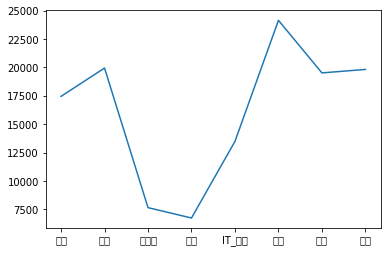

In [0]:
y = []
mnth = mnth.drop_duplicates()
topicList = list(set(mnth.sort_values(by=["주제"])["주제"].to_list()))
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# plt.rcParams['font.family'] = 'NanumGothic'


font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)


for topic in topicList:
  sumVal = (mnth["주제"]==topic).sum()
  y.append(sumVal)
  print(topic ,"count : ", sumVal)

plt.xlabel("",fontproperties=fontprop)
plt.plot(topicList, y,)
plt.show()


In [0]:
# data
import pandas as pd

In [0]:
num = 0
data = ""
d = pd.read_csv("drive/My Drive/Colab Notebooks/Machine Learning/RNN/dataPrs"+data+".csv",encoding='UTF8')
print(d.shape[0])
num += d.shape[0]

data = "01"
d = pd.read_csv("drive/My Drive/Colab Notebooks/Machine Learning/RNN/dataPrs"+data+".csv",encoding='UTF8')
print(d.shape[0])
num += d.shape[0]

data = "02"
d = pd.read_csv("drive/My Drive/Colab Notebooks/Machine Learning/RNN/dataPrs"+data+".csv",encoding='UTF8')
print(d.shape[0])
num += d.shape[0]

data = "05"
d = pd.read_csv("drive/My Drive/Colab Notebooks/Machine Learning/RNN/dataPrs"+data+".csv",encoding='UTF8')
print(d.shape[0])
num += d.shape[0]

print("\n",num)


FileNotFoundError: ignored

# data quality check 

In [0]:
topic = "pol"
pol = pd.read_csv('drive/My Drive/Colab Notebooks/Machine Learning/RNN/'+topic+'utf.csv',encoding='UTF8')


In [0]:
pol.columns

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3', '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드', '특성추출', '본문', 'URL', '분석제외 여부'], dtype='object')

In [0]:
pol = pol.drop(['뉴스 식별자', '일자', '언론사','본문',"통합 분류2","통합 분류3","특성추출", '기고자', '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관','URL', '분석제외 여부'], axis = 1)

In [0]:
cat = pol["통합 분류1"].head(100)

In [0]:
type(cat)

pandas.core.series.Series

In [0]:


for i, c in enumerate(cat):
  # print()
  c = c.split(">")
  print(c[0])
  if i > 10:
    break



정치
정치
사회
정치
정치
사회
정치
국제
정치
정치
사회
정치


In [0]:
pol["주제"] = None
pol

,제목,통합 분류1,키워드,주제
0,[세상읽기]문재인 정부의 대외적 자율성,정치>외교,"문재인,정부,대외,자율,국제정치학,주권국가,무형,인적,물적,자원,국경,이동,통제권,...",None
1,[하태훈의 법과 사회]‘미리 알 권리’도 알 권리인가,정치>행정_자치,"권리,권리,관행,시점,의도,의심,권력,선거,개입,혐의,기소,사건,관례,의혹,울산,시...",None
2,'텔레그램 n번 방' 국회 청원 10만 명 참여,사회>사회일반,"텔레그램,n번,10만,국회,청원,참여,국회,사무처,텔레그램,발생,디지털,성범죄,해결...",None
3,"[정참시] ""미래한국당 창고 사무실"" 논란 / 이낙연-황교안 어색한 서민행세",정치>국회_정당,"사무실,미래,한국당,창고,논란,이낙연,황교안,서민행세,앵커,정치,참견,시점,박영회,...",None
4,"""1980년 무슨 사태"" 황교안 5 18 '폄훼' 논란",정치>정치일반,"1980년,사태,황교,5,논란,앵커,대표,황교,자유,한국당,시절,대학,언급,사태,휴...",None
...,...,...,...,...
19995,"'노무현 사위' 곽상언, 22일 민주당 입당 충북 동남4군 출마",정치>국회_정당,"노무현,사위,곽상언,입당,민주당,충북,동남,출마,곽상언,변호사,중부매일,김홍민,노무...",None
19996,與 “우한 폐렴 대응 최선 다할 것 朴정부 메르스 반면교사”,정치>정치일반,"최선,폐렴,대응,정부,메르스,교사,신종,코로나바이러스,중국,폐렴,중국인,확진자,발생...",None
19997,"거제4동, 설맞이 따뜻한 이웃사랑 손길 이어져",사회>여성,"거제4동,설맞이,이웃,사랑,손길,연제구,거제,동장,김윤신,명절,이웃,사랑,손길,해맞...",None
19998,"외교부 ""이란, 호르무즈해협 파병 우려 표명""",정치>외교,"외교부,호르무즈해협,파병,표명,한국정부,청해부대,파병,호르무즈해협,독자,결정,이란,...",None


In [0]:
pol.shape[0]

20000

In [0]:
# print(pol["통합 분류1"][0].split(">")[0])
# for i in range()
for i in range(pol.shape[0]):
  pol["주제"][i]=pol["통합 분류1"][i].split(">")[0]

In [0]:
pol

,제목,통합 분류1,키워드,주제
0,[세상읽기]문재인 정부의 대외적 자율성,정치>외교,"문재인,정부,대외,자율,국제정치학,주권국가,무형,인적,물적,자원,국경,이동,통제권,...",정치
1,[하태훈의 법과 사회]‘미리 알 권리’도 알 권리인가,정치>행정_자치,"권리,권리,관행,시점,의도,의심,권력,선거,개입,혐의,기소,사건,관례,의혹,울산,시...",정치
2,'텔레그램 n번 방' 국회 청원 10만 명 참여,사회>사회일반,"텔레그램,n번,10만,국회,청원,참여,국회,사무처,텔레그램,발생,디지털,성범죄,해결...",사회
3,"[정참시] ""미래한국당 창고 사무실"" 논란 / 이낙연-황교안 어색한 서민행세",정치>국회_정당,"사무실,미래,한국당,창고,논란,이낙연,황교안,서민행세,앵커,정치,참견,시점,박영회,...",정치
4,"""1980년 무슨 사태"" 황교안 5 18 '폄훼' 논란",정치>정치일반,"1980년,사태,황교,5,논란,앵커,대표,황교,자유,한국당,시절,대학,언급,사태,휴...",정치
...,...,...,...,...
19995,"'노무현 사위' 곽상언, 22일 민주당 입당 충북 동남4군 출마",정치>국회_정당,"노무현,사위,곽상언,입당,민주당,충북,동남,출마,곽상언,변호사,중부매일,김홍민,노무...",정치
19996,與 “우한 폐렴 대응 최선 다할 것 朴정부 메르스 반면교사”,정치>정치일반,"최선,폐렴,대응,정부,메르스,교사,신종,코로나바이러스,중국,폐렴,중국인,확진자,발생...",정치
19997,"거제4동, 설맞이 따뜻한 이웃사랑 손길 이어져",사회>여성,"거제4동,설맞이,이웃,사랑,손길,연제구,거제,동장,김윤신,명절,이웃,사랑,손길,해맞...",사회
19998,"외교부 ""이란, 호르무즈해협 파병 우려 표명""",정치>외교,"외교부,호르무즈해협,파병,표명,한국정부,청해부대,파병,호르무즈해협,독자,결정,이란,...",정치


In [0]:
pol.columns

Index(['제목', '통합 분류1', '키워드', '주제'], dtype='object')

In [0]:
pol.head(20)

,제목,통합 분류1,키워드,주제
0,[세상읽기]문재인 정부의 대외적 자율성,정치>외교,"문재인,정부,대외,자율,국제정치학,주권국가,무형,인적,물적,자원,국경,이동,통제권,...",정치
1,[하태훈의 법과 사회]‘미리 알 권리’도 알 권리인가,정치>행정_자치,"권리,권리,관행,시점,의도,의심,권력,선거,개입,혐의,기소,사건,관례,의혹,울산,시...",정치
2,'텔레그램 n번 방' 국회 청원 10만 명 참여,사회>사회일반,"텔레그램,n번,10만,국회,청원,참여,국회,사무처,텔레그램,발생,디지털,성범죄,해결...",사회
3,"[정참시] ""미래한국당 창고 사무실"" 논란 / 이낙연-황교안 어색한 서민행세",정치>국회_정당,"사무실,미래,한국당,창고,논란,이낙연,황교안,서민행세,앵커,정치,참견,시점,박영회,...",정치
4,"""1980년 무슨 사태"" 황교안 5 18 '폄훼' 논란",정치>정치일반,"1980년,사태,황교,5,논란,앵커,대표,황교,자유,한국당,시절,대학,언급,사태,휴...",정치
5,"동선 나올 때마다 휴원 휴업 속출 ""꼭 그래야 하나""",사회>의료_건강,"동선,휴원,휴업,속출,앵커,확진,환자,시설,방역,하루,이틀,필수,확진자들,확진자,지...",사회
6,"크리스토퍼 힐 “비핵화, 신뢰보다 검증이 중요 유화주의 경계해야”",정치>북한,"크리스토퍼,비핵화,크리스토퍼,신뢰,검증,중요,유화주,경계,평창평화포럼,방한,동아,국...",정치
7,중국 내 외국인 확진자 27명...22명 격리,국제>중국,"중국,27명,외국인,확진자,22명,격리,중국,감염증,신종,코로나바이러스,사람,외국인...",국제
8,"한국당 ""태영호 서울 지역구에 공천""",정치>청와대,"한국당,태영호,서울,지역구,공천,태영호,공사,주영,북한,대사관,사진,자유한국당,입당...",정치
9,"與, '우리법연구회' 출신 최기상 前 판사 영입 광주 출마 검토",정치>선거,"우리법연구회,영입,출신,최기상,판사,검토,광주,출마,대안,동구남구갑,장병완,의원,지...",정치


Inside cleanUp Function:
data.shape[0] :  20000
pol['통합 분류1'][i].split(">")[0] :  문화


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


                                                      제목                                                키워드    주제
0                                          [매일칼럼] 아첨과 독재  아첨,독재,천재적,예지,영군술,무비,담력,필승,신념,조국,통일,앞길,은인,불세출,영...  None
1      [외부자들] 강효상 의원의 한 미 정상 통화내용 폭로, 공익제보인가, 국가 기밀 누...  강효상,의원,폭로,정상,통화내용,공익제보,누설,국가,기밀,2일,일요일,9시,방송,외...  None
2                             군포시의회 성복임 이길호 의원, 최우수의원 수상  군포시의회,성복임,이길호,의원,우수,의원,수상,군포시의회,의장,이견행,수원,컨벤션,...  None
3                                 공주대, 제7대 총장에 원성수 교수 임명  공주대,총장,임명,원성수,교수,총장,공주대학교,원성수,사진,교수,임명,정부,행정학,...  None
4                          [사설] 대통령 한마디에 날아간 국가 미래 재정건전성  대통령,한마디,재정건전성,국가,미래,홍남기,경제부총리,워크숍,지난달,더불어민주당,의...  None
...                                                  ...                                                ...   ...
19995                           현대중공업 법인분할, 노동부 적극 대응 주문  현대중공업,법인,분할,노동부,적극,대응,주문,김종훈,국회의원,울산동,국회,장관,이재...  None
19996                      더불어민주당과 노동당 울산시당 ‘조기 총선체제’ 가동  더불어민주당,노동당,울산시당,조기,총선,체제,가동,더불

KeyboardInterrupt: ignored

In [0]:
topicList = ["pol", "eco", "cul", "cul", "innt", "it", "spo","soc"]
for topic in topicList:
  try:
    data = pd.read_csv('drive/My Drive/Colab Notebooks/Machine Learning/RNN/05'+topic+'utf.csv',encoding='UTF8')
    cleanUp(data)
  except:
    print(topic)
# pol = cleanUp(pol)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


innt


In [0]:
pol

,제목,키워드,주제
0,[매일칼럼] 아첨과 독재,"아첨,독재,천재적,예지,영군술,무비,담력,필승,신념,조국,통일,앞길,은인,불세출,영...",문화
1,"[외부자들] 강효상 의원의 한 미 정상 통화내용 폭로, 공익제보인가, 국가 기밀 누...","강효상,의원,폭로,정상,통화내용,공익제보,누설,국가,기밀,2일,일요일,9시,방송,외...",정치
2,"군포시의회 성복임 이길호 의원, 최우수의원 수상","군포시의회,성복임,이길호,의원,우수,의원,수상,군포시의회,의장,이견행,수원,컨벤션,...",지역
3,"공주대, 제7대 총장에 원성수 교수 임명","공주대,총장,임명,원성수,교수,총장,공주대학교,원성수,사진,교수,임명,정부,행정학,...",정치
4,[사설] 대통령 한마디에 날아간 국가 미래 재정건전성,"대통령,한마디,재정건전성,국가,미래,홍남기,경제부총리,워크숍,지난달,더불어민주당,의...",정치
...,...,...,...
19995,"현대중공업 법인분할, 노동부 적극 대응 주문","현대중공업,법인,분할,노동부,적극,대응,주문,김종훈,국회의원,울산동,국회,장관,이재...",사회
19996,더불어민주당과 노동당 울산시당 ‘조기 총선체제’ 가동,"더불어민주당,노동당,울산시당,조기,총선,체제,가동,더불어민주당,울산시당,울산시당,민...",정치
19997,"박지원 “문재인대통령, 한국당 요구 수용을”","박지원,문재인,대통령,수용,한국당,요구,과거,여야,영수회담,언급,대표,단독,만남,제...",정치
19998,이젠 경제까지 챙기는 조국,"이젠,경제,조국,페이스북,활동,민정수석,조국,청와대,행정관,청와대,경제,경제,공유,...",정치


In [0]:
# topic = "pol"
pol = pd.read_csv('drive/My Drive/Colab Notebooks/Machine Learning/RNN/05'+"pol"+'utf.csv',encoding='UTF8')
cleanUp(pol)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,제목,키워드,주제
0,[매일칼럼] 아첨과 독재,"아첨,독재,천재적,예지,영군술,무비,담력,필승,신념,조국,통일,앞길,은인,불세출,영...",문화
1,"[외부자들] 강효상 의원의 한 미 정상 통화내용 폭로, 공익제보인가, 국가 기밀 누...","강효상,의원,폭로,정상,통화내용,공익제보,누설,국가,기밀,2일,일요일,9시,방송,외...",정치
2,"군포시의회 성복임 이길호 의원, 최우수의원 수상","군포시의회,성복임,이길호,의원,우수,의원,수상,군포시의회,의장,이견행,수원,컨벤션,...",지역
3,"공주대, 제7대 총장에 원성수 교수 임명","공주대,총장,임명,원성수,교수,총장,공주대학교,원성수,사진,교수,임명,정부,행정학,...",정치
4,[사설] 대통령 한마디에 날아간 국가 미래 재정건전성,"대통령,한마디,재정건전성,국가,미래,홍남기,경제부총리,워크숍,지난달,더불어민주당,의...",정치
...,...,...,...
19995,"현대중공업 법인분할, 노동부 적극 대응 주문","현대중공업,법인,분할,노동부,적극,대응,주문,김종훈,국회의원,울산동,국회,장관,이재...",사회
19996,더불어민주당과 노동당 울산시당 ‘조기 총선체제’ 가동,"더불어민주당,노동당,울산시당,조기,총선,체제,가동,더불어민주당,울산시당,울산시당,민...",정치
19997,"박지원 “문재인대통령, 한국당 요구 수용을”","박지원,문재인,대통령,수용,한국당,요구,과거,여야,영수회담,언급,대표,단독,만남,제...",정치
19998,이젠 경제까지 챙기는 조국,"이젠,경제,조국,페이스북,활동,민정수석,조국,청와대,행정관,청와대,경제,경제,공유,...",정치
